In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv('/media/hdd1/covid19_kaggle/origin_data/metadata.csv')

# Journal distribution

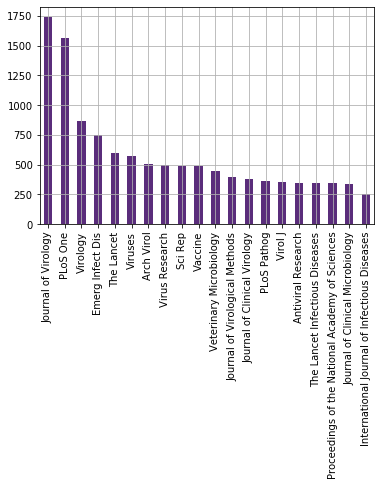

In [18]:
metadata.journal.value_counts()[0:20].plot(kind='bar',color='#5A2D7B')
plt.grid()
plt.show()

# Has Full text

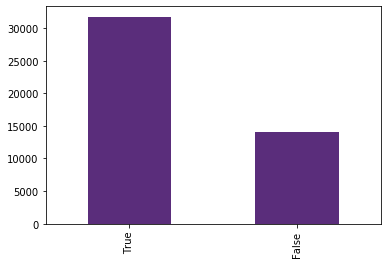

In [17]:
metadata.has_full_text.value_counts().plot(kind='bar',color='#5A2D7B',)


# Most Commun words on titles

In [29]:
df = metadata[~metadata.title.isna()]

In [34]:
titles =""

In [37]:
titles = ''.join(df.title.values)

In [52]:
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
from tqdm import tqdm 

In [56]:
stop_words = set(stopwords.words("english"))
stop_words = stop_words.union(set(['a', 'i', 'mr', 'ms', 'mrs', 'one', 'two', 'said','novel','chapter']))

In [60]:
def plot_word_frequency(bow,nb_words):
    """
    Function to plot word frequency given bow
    in : 
     - bow
     - nb_words : display most frequent nb_words
    out : 
     - barplot
    """
    sorted_sections = {k: v for k, v in sorted(Counter(bow).items(), key=lambda item: item[1], reverse=True)} 
    fig = plt.gcf()
    ax = plt.gca()
    fig.set_size_inches(20, 10)
    plt.xticks()#rotation=90)
    sns.barplot(y=list(sorted_sections.keys())[:nb_words], x=list(sorted_sections.values())[:nb_words],color='#400080')
    
    

In [50]:
dff = metadata.dropna(subset=['title'])


In [57]:
title_bow = [word for words in tqdm(dff.title.values) for word in words.lower().replace('abstract', '').split(' ') if word not in stop_words]

100%|██████████| 45617/45617 [00:00<00:00, 363965.50it/s]


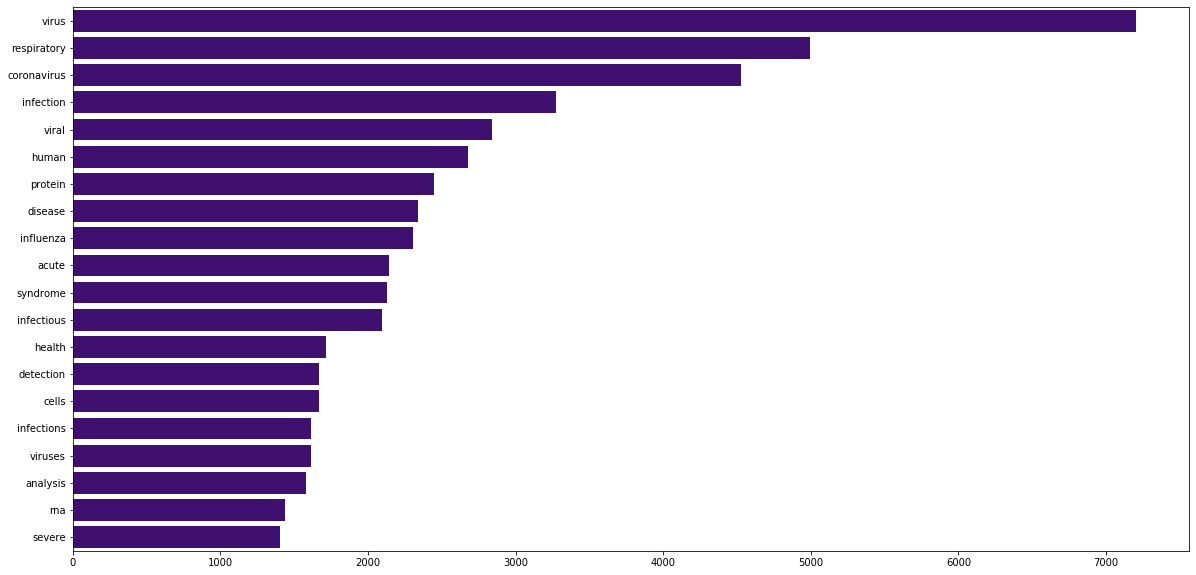

In [61]:
plot_word_frequency(title_bow,20)